In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import io
from PIL import Image
import numpy as np

In [2]:
audio_file = "PinkPanther30.wav"

In [3]:
ipd.Audio(audio_file)

In [4]:
scale, sr = librosa.load(audio_file)

In [5]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [6]:
S_scale = librosa.stft(scale, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [7]:
S_scale.shape

(1025, 1292)

In [8]:
type(S_scale[0][0])

numpy.complex64

In [9]:
Y_scale = np.abs(S_scale) ** 2

In [10]:
Y_scale.shape

(1025, 1292)

In [11]:
type(Y_scale[0][0])

numpy.float32

In [12]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

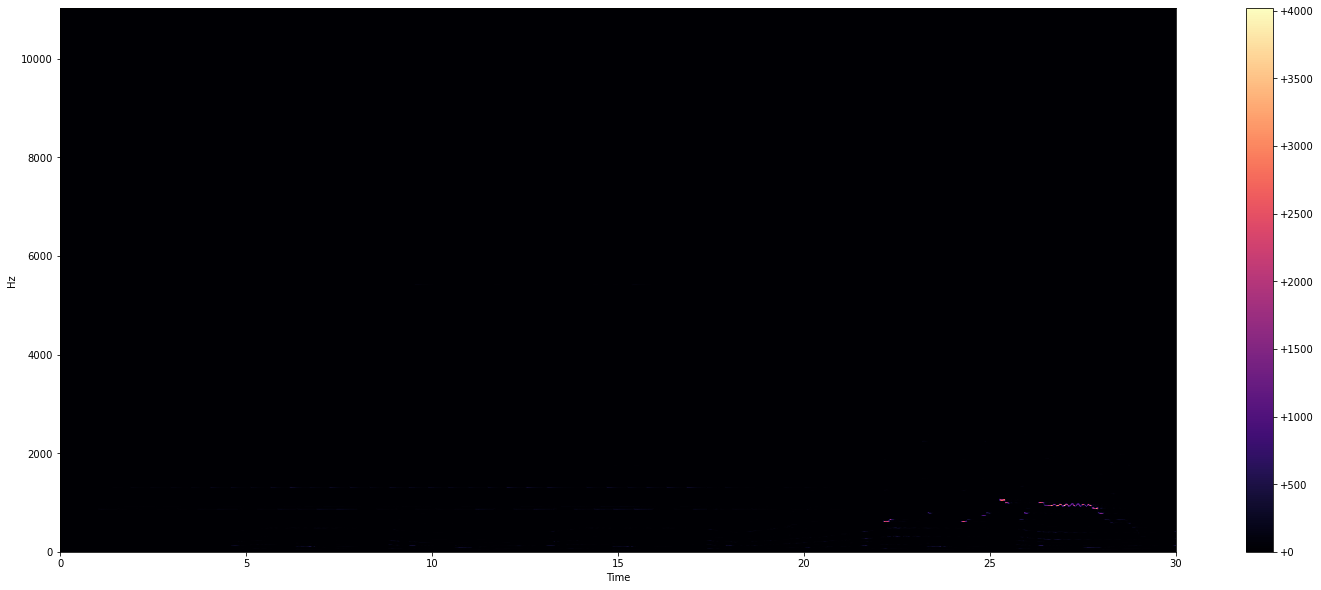

In [13]:
plot_spectrogram(Y_scale, sr, HOP_SIZE)

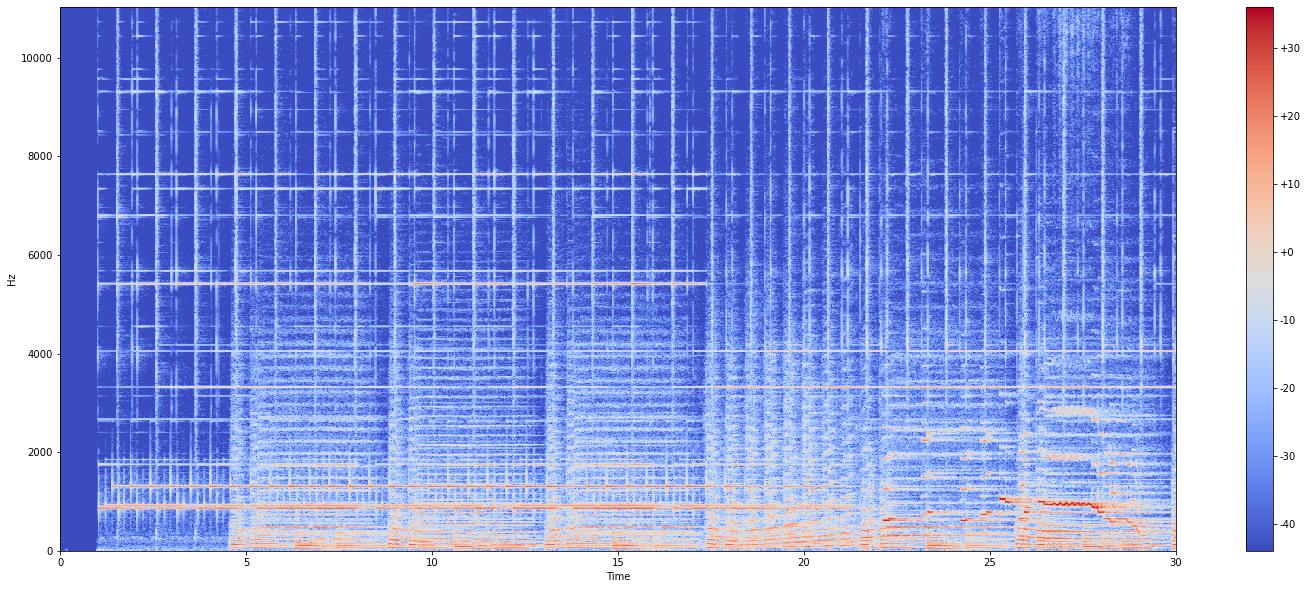

In [14]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

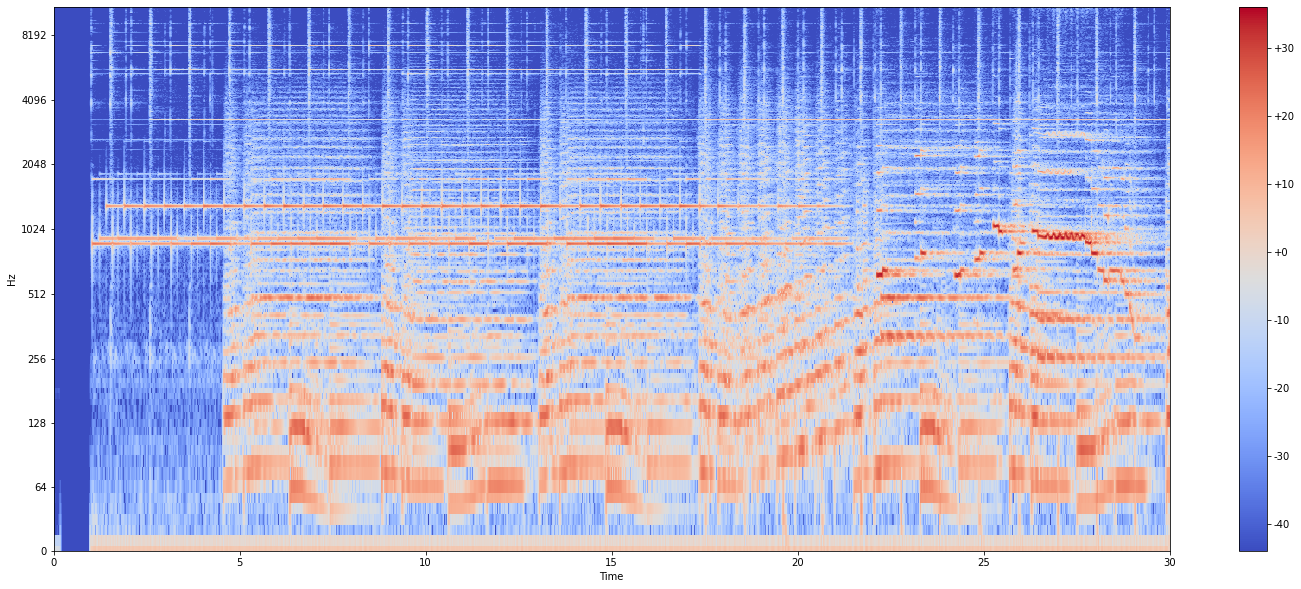

In [16]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")
plt.savefig('spectrogram.png')